<a href="https://colab.research.google.com/github/apriandito/xai/blob/main/Simple_Walkthrough_on_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Data**

In [ ]:
# Import Pandas libraries
import pandas as pd

See [Polars](https://pola.rs/) as an alternative to Pandas. Faster and lighter, built on the top of Rust.

In [ ]:
# Load dataset into a pandas DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/apriandito/xai/main/data/german_credit_data.csv", index_col=0)

# Display the DataFrame to inspect the data
df

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0     67    male    2     own             NaN           little           1169   
1     22  female    2     own          little         moderate           5951   
2     49    male    1     own          little              NaN           2096   
3     45    male    2    free          little           little           7882   
4     53    male    2    free          little           little           4870   
..   ...     ...  ...     ...             ...              ...            ...   
995   31  female    1     own          little              NaN           1736   
996   40    male    3     own          little           little           3857   
997   38    male    2     own          little              NaN            804   
998   23    male    2    free          little           little           1845   
999   27    male    2     own        moderate         moderate           4576   

     Duration              Purpose  Risk  
0           6             radio/TV  good  
1          48             radio/TV   bad  
2          12            education  good  
3          42  furniture/equipment  good  
4          24                  car   bad  
..        ...                  ...   ...  
995        12  furniture/equipment  good  
996        30                  car  good  
997        12             radio/TV  good  
998        45             radio/TV   bad  
999        45                  car  good  

[1000 rows x 10 columns]

# **Data Exploration**

## **ydata-profiling**

In [ ]:
# Install the ydata-profiling
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 50.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5295e4a4cd7ffa3b91e32a64e2303c93359f74249bdf8f8ff7ba8d9fa08b4880
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [ ]:
# Import ProfileReport from ydata_profiling for generating data profiling reports
from ydata_profiling import ProfileReport

# Generate report
report_ydata = ProfileReport(df, title="Profiling Report")

# Display the ydata-profiling report
report_ydata

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## **Sweetviz**

In [ ]:
# Install the sweetviz
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 61.0 MB/s eta 0:00:00


In [ ]:
# Import the sweetviz library
import sweetviz as sv

# Generate report
report_sweetviz = sv.analyze(df)

# Output the sweetviz report as an HTML
report_sweetviz.show_html('report_sweetviz.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# **Create a Machine Learning Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Define features and target variable
X = df.drop(['Risk', 'Saving accounts', 'Checking account'], axis=1)
y = df['Risk']

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(sparse=False)
label_encoder = LabelEncoder()

X_encoded = pd.get_dummies(X, columns=['Sex', 'Housing', 'Purpose'])
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42)

In [ ]:
# Show training data
X_train

Age  Job  Credit amount  Duration  Sex_female  Sex_male  Housing_free  \
328   31    2           4473        36           0         1             0   
891   46    2           1829        15           0         1             0   
255   27    1           7418        60           0         1             0   
243   27    2           1185        12           1         0             0   
492   27    2           1237         6           1         0             0   
..   ...  ...            ...       ...         ...       ...           ...   
73    41    1           5954        42           1         0             0   
401   28    2           1887        18           0         1             0   
769   63    1           1655        12           0         1             0   
2     49    1           2096        12           0         1             0   
617   37    2           3676         6           0         1             0   

     Housing_own  Housing_rent  Purpose_business  Purpose_car  \
328            1             0                 0            0   
891            1             0                 0            0   
255            1             0                 0            0   
243            1             0                 1            0   
492            1             0                 0            0   
..           ...           ...               ...          ...   
73             1             0                 1            0   
401            1             0                 1            0   
769            1             0                 0            0   
2              1             0                 0            0   
617            0             1                 0            1   

     Purpose_domestic appliances  Purpose_education  \
328                            0                  0   
891                            0                  0   
255                            0                  0   
243                            0                  0   
492                            0                  0   
..                           ...                ...   
73                             0                  0   
401                            0                  0   
769                            0                  0   
2                              0                  1   
617                            0                  0   

     Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  \
328                            0                 1                0   
891                            0                 1                0   
255                            0                 1                0   
243                            0                 0                0   
492                            0                 1                0   
..                           ...               ...              ...   
73                             0                 0                0   
401                            0                 0                0   
769                            0                 1                0   
2                              0                 0                0   
617                            0                 0                0   

     Purpose_vacation/others  
328                        0  
891                        0  
255                        0  
243                        0  
492                        0  
..                       ...  
73                         0  
401                        0  
769                        0  
2                          0  
617                        0  

[700 rows x 17 columns]

## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree classifier
dt_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)
dt_clf.fit(X_train, y_train)

# Predict and evaluate the model
print(classification_report(y_test, dt_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.55      0.20      0.29        90
           1       0.73      0.93      0.82       210

    accuracy                           0.71       300
   macro avg       0.64      0.56      0.56       300
weighted avg       0.67      0.71      0.66       300



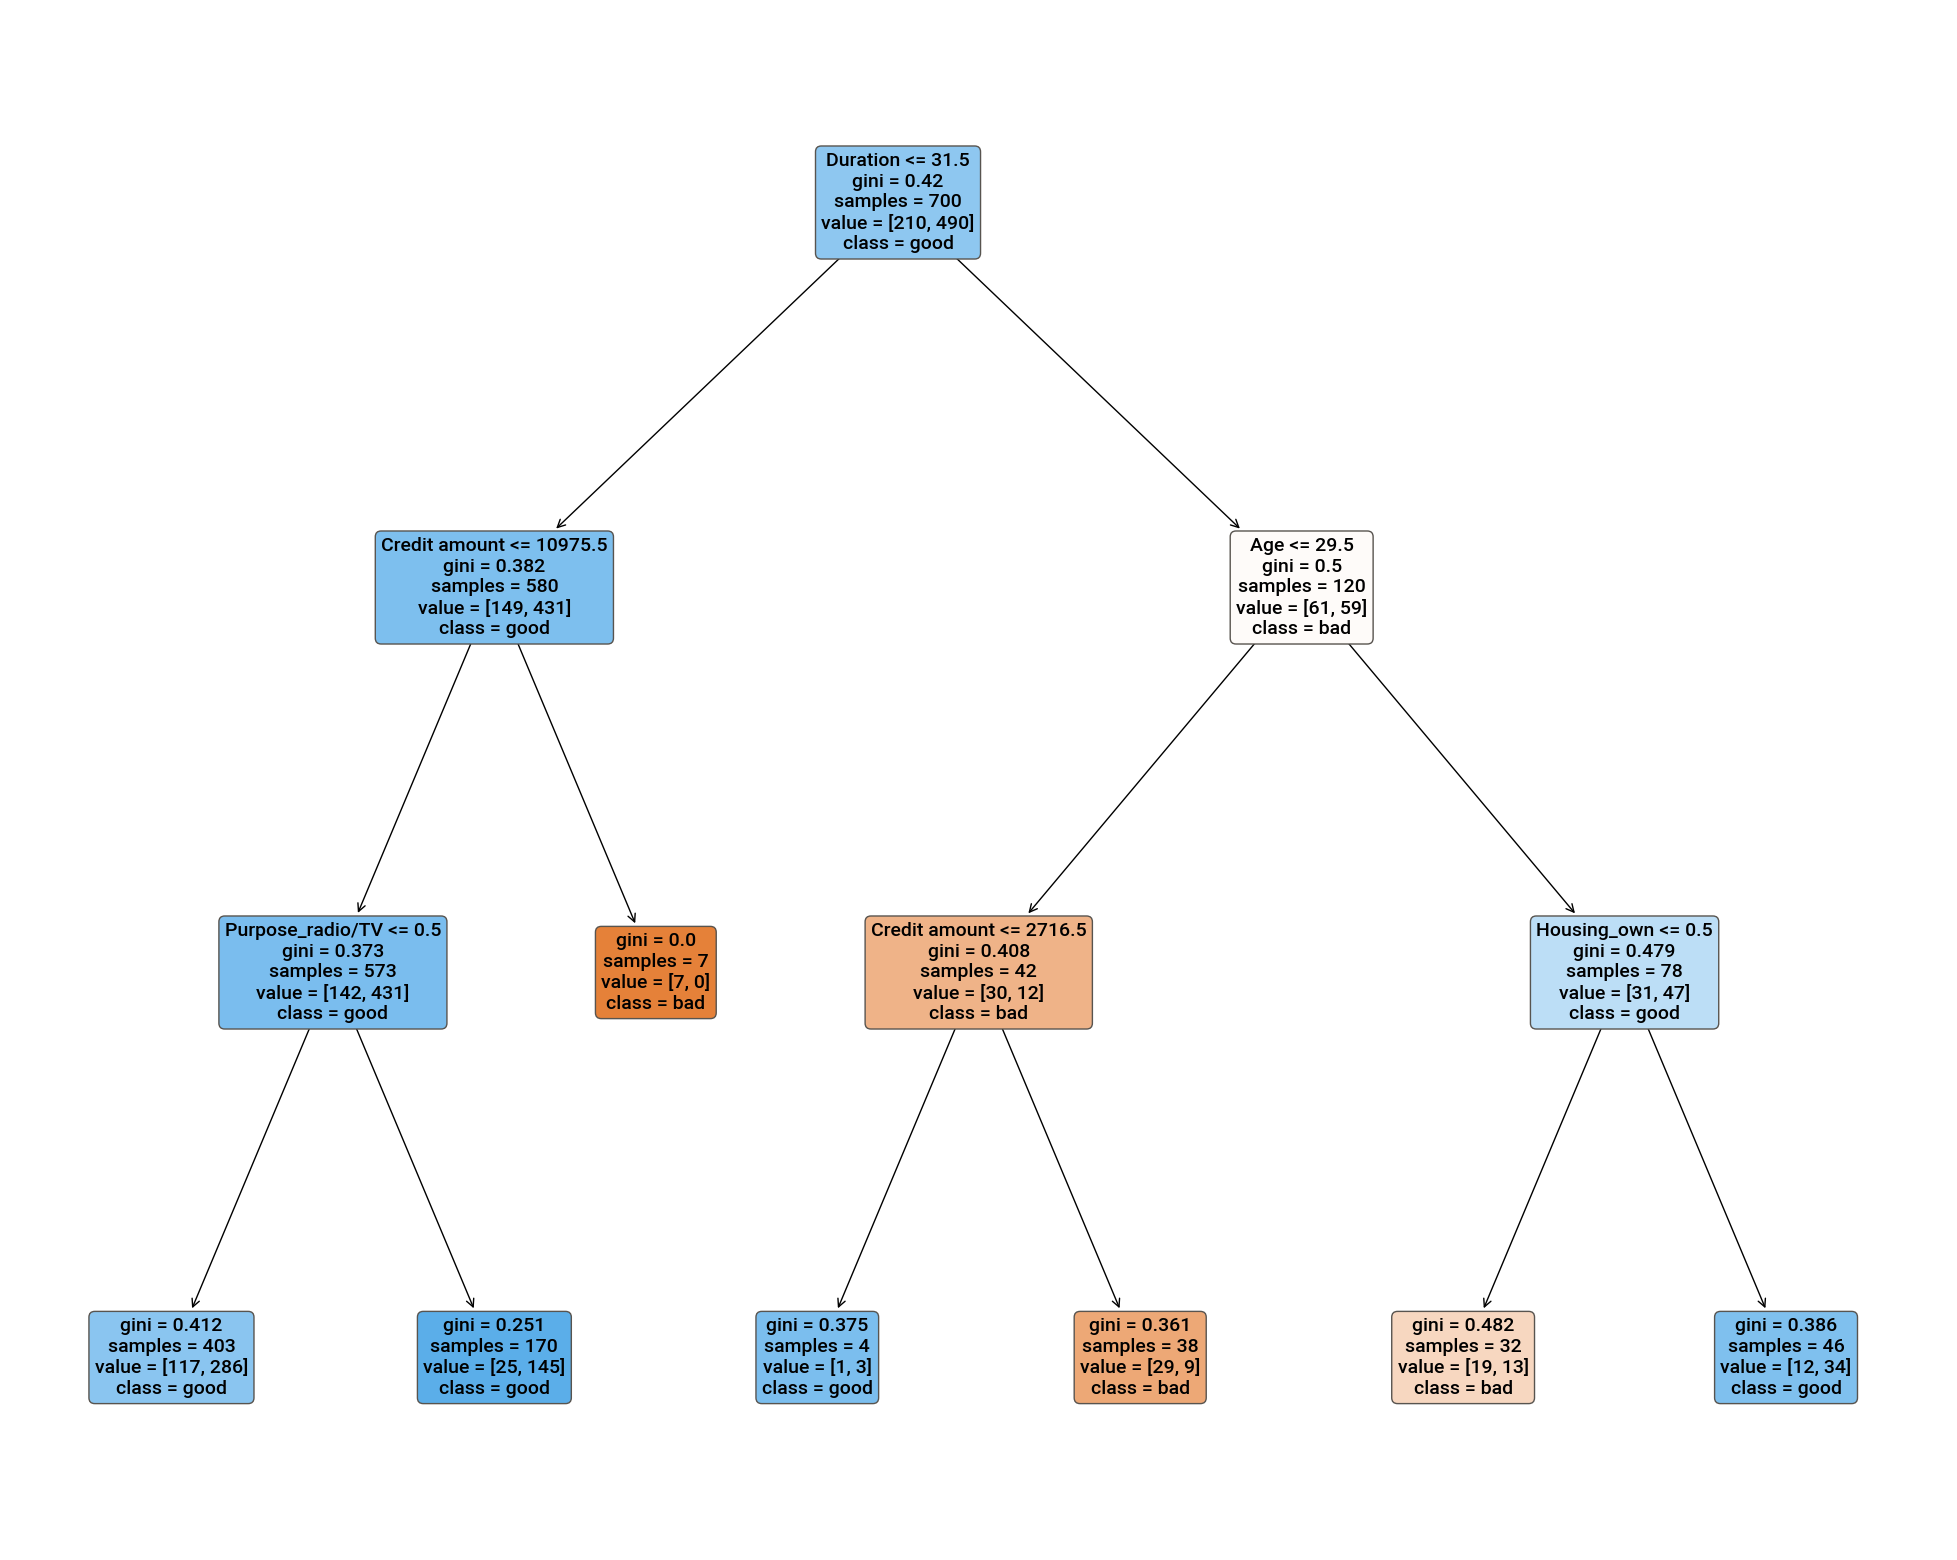

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
fig = plt.figure(figsize=(25, 20))
_ = plot_tree(dt_clf,
              feature_names=list(X_train.columns),
              class_names=['bad', 'good'],
              filled=True,
              rounded=True,
              fontsize=14)

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
lr_clf = LogisticRegression(max_iter=1000, random_state=13)
lr_clf.fit(X_train, y_train)

# Predict and evaluate the model
print(classification_report(y_test, lr_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.45      0.17      0.24        90
           1       0.72      0.91      0.81       210

    accuracy                           0.69       300
   macro avg       0.59      0.54      0.52       300
weighted avg       0.64      0.69      0.64       300



In [ ]:
# Retrieve model coefficients
coefficients = lr_clf.coef_

# Map coefficients to corresponding feature names
feature_names = X_encoded.columns
coefficients_df = pd.DataFrame(coefficients, columns=list(X_train.columns)).transpose()
coefficients_df.columns = ['Coefficients']

# Display coefficients for each feature
coefficients_df

Coefficients
Age                              0.021545
Job                              0.202637
Credit amount                   -0.000033
Duration                        -0.033939
Sex_female                      -0.149361
Sex_male                         0.259874
Housing_free                    -0.145564
Housing_own                      0.394334
Housing_rent                    -0.138257
Purpose_business                -0.012321
Purpose_car                     -0.005549
Purpose_domestic appliances     -0.006746
Purpose_education               -0.180400
Purpose_furniture/equipment     -0.047413
Purpose_radio/TV                 0.467668
Purpose_repairs                 -0.060326
Purpose_vacation/others         -0.044399

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest
rf_clf = RandomForestClassifier(max_features=2, n_estimators =100 ,bootstrap = True)
rf_clf.fit(X_train, y_train)

# Classification Report
print(classification_report(y_test, rf_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.34      0.19      0.24        90
           1       0.71      0.84      0.77       210

    accuracy                           0.65       300
   macro avg       0.52      0.52      0.51       300
weighted avg       0.60      0.65      0.61       300



## **ANN - MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the MLP with the scaled data
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000, random_state=13)
mlp_clf.fit(X_train_scaled, y_train)

# Classification Report
print(classification_report(y_test, mlp_clf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.40      0.34      0.37        90
           1       0.73      0.78      0.75       210

    accuracy                           0.65       300
   macro avg       0.57      0.56      0.56       300
weighted avg       0.63      0.65      0.64       300



# **Model Agnostic Explanation**

## **SHAP (SHapley Additive exPlanations)**

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 10.3 MB/s eta 0:00:00


In [ ]:
import shap

# Initialize the SHAP explainer with the Random Forest classifier
explainer = shap.Explainer(rf_clf)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

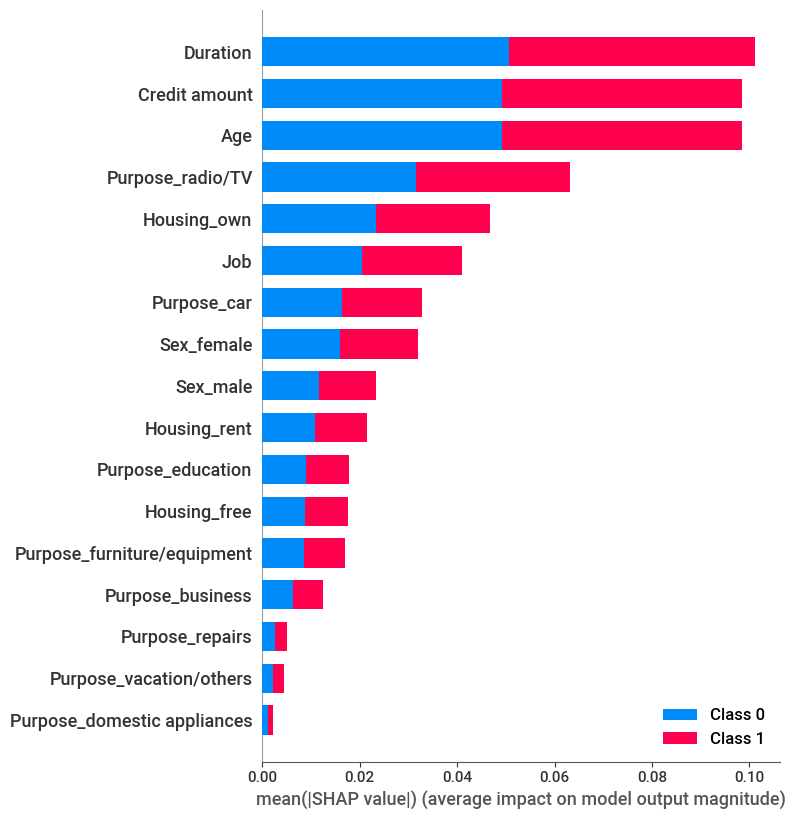

In [ ]:
# Global feature importance summary plot for all classes
shap.summary_plot(shap_values, X_test)

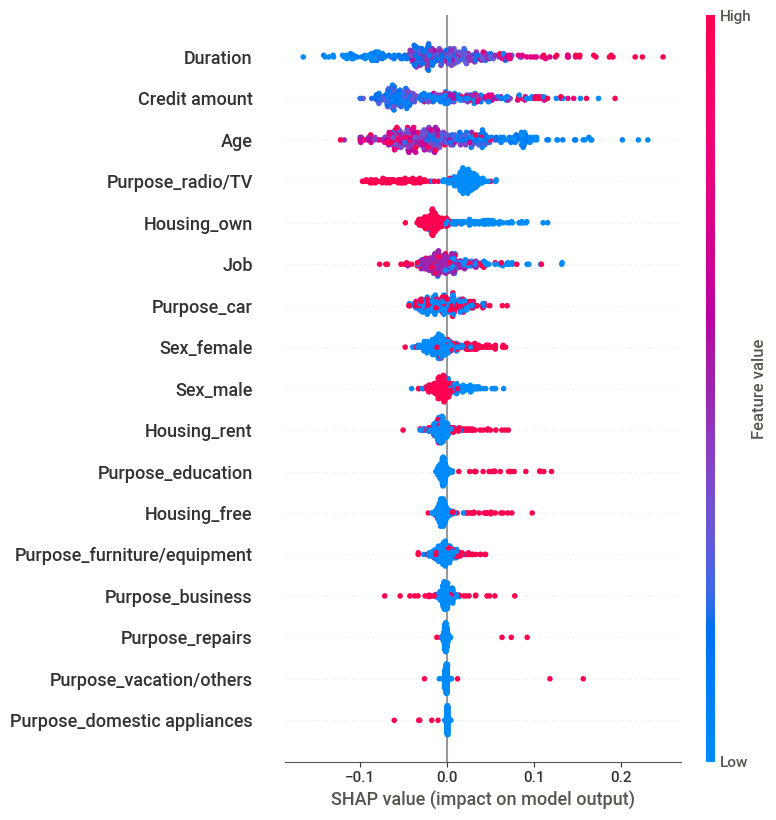

In [ ]:
# Global feature importance summary plot for the first class
shap.summary_plot(shap_values[0], X_test)

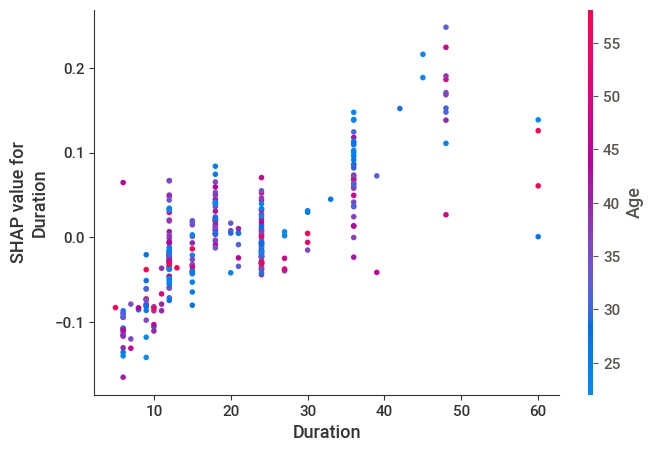

In [ ]:
# Dependence plot for 'Duration' feature, showing its effect and interaction with 'Age' on model output for the first class
shap.dependence_plot("Duration", shap_values[0], X_test,interaction_index="Age")

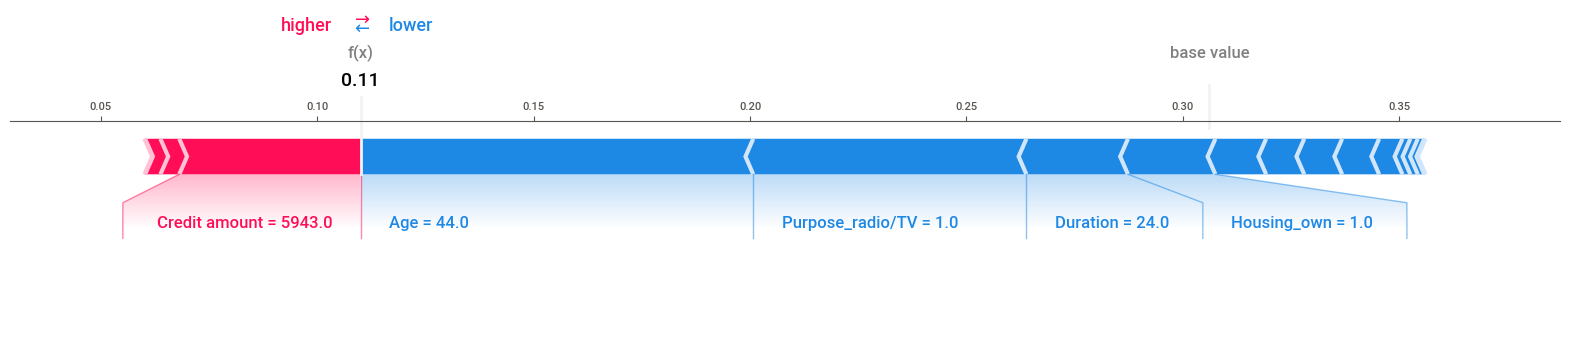

In [ ]:
# Force plot for the first prediction of the first class, illustrating the contribution of each feature to that specific prediction
shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)

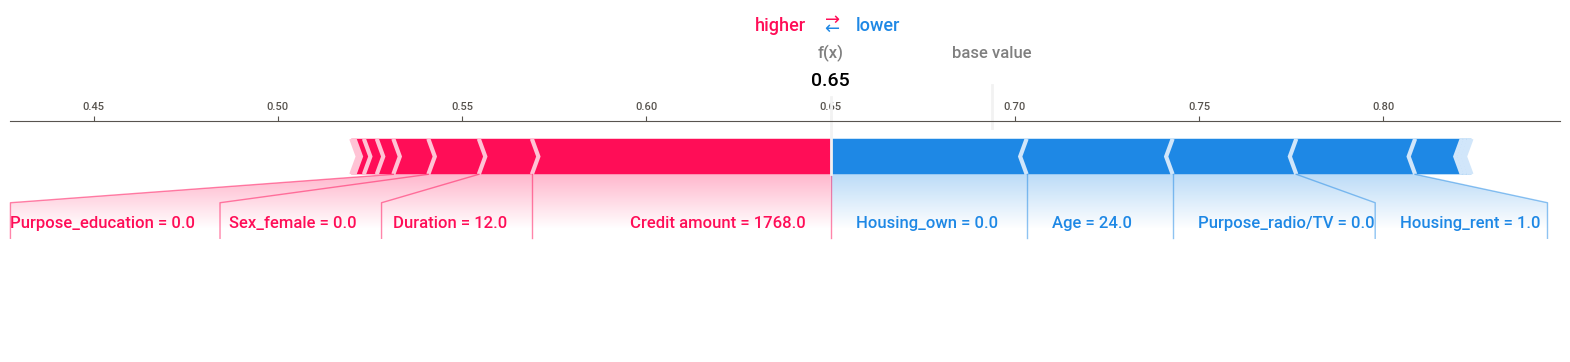

In [ ]:
# Force plot for the seventh prediction of the second class (or the positive class in binary classification), showing individual feature contributions
shap.plots.force(explainer.expected_value[1], shap_values[1][6, :], X_test.iloc[6, :],matplotlib = True)

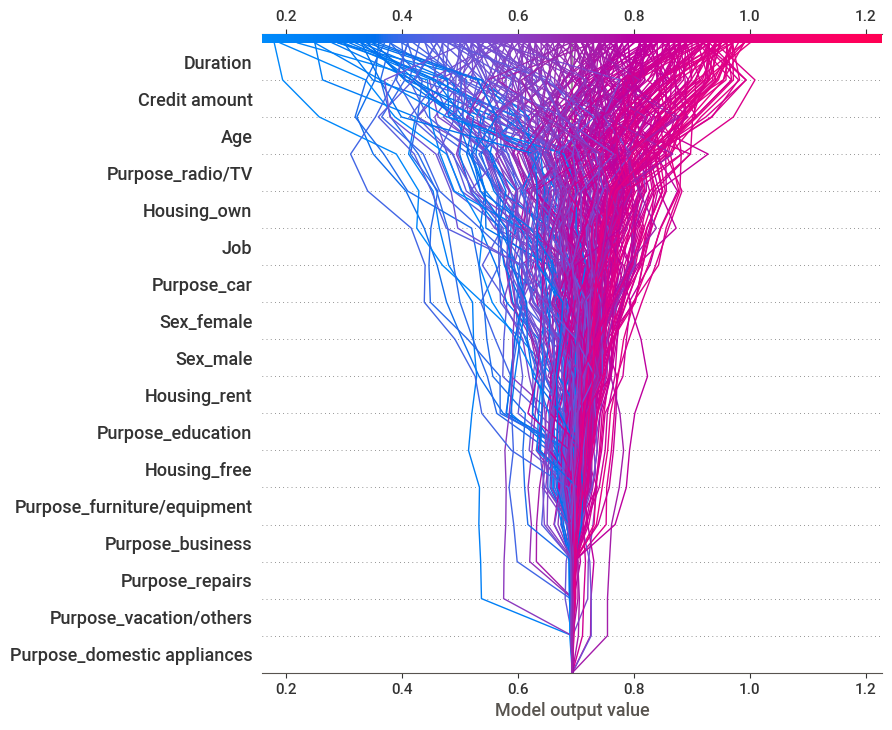

In [ ]:
# Decision plot for the positive class, illustrating cumulative feature contributions to the model's output across all test samples
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.columns)

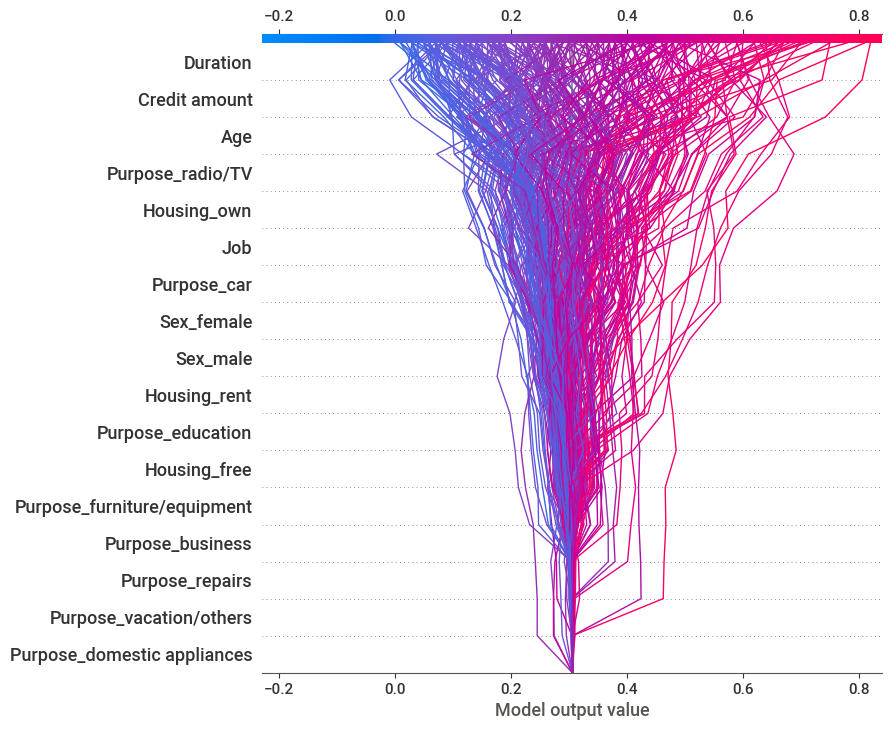

In [ ]:
# Decision plot for the first class, showing how features contribute to the model's output
shap.decision_plot(explainer.expected_value[0], shap_values[0], X_test.columns)

## **LIME (Local Interpretable Model-agnostic Explanations)**


In [ ]:
! pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=c3ea95b2af8e294e86a888aa3ec70458502734bb7d149bb10272f6060c5e1a92
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime import lime_tabular
import numpy as np
# Ignore underflow errors which can occur during LIME explanation generation
np.seterr(under='ignore')

# Initialize LIME Explainer for tabular data
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=list(X_train.columns),
    mode='classification'
)

# Generate explanation for a single instance from the test set
exp = explainer.explain_instance(
    data_row=X_test.iloc[0],
    predict_fn=rf_clf.predict_proba
)

# Display the explanation
exp.show_in_notebook(show_table=True)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
